In [1]:
%ls ..

1-Preparation/  2-Run1/  3-Analysis/


In [2]:
from __future__ import print_function
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] # larger image
#matplotlib.rcParams['figure.figsize']= (20.0, 10.0) # larger image


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.6.6 |Anaconda custom (64-bit)| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]

matplotlib version: 3.0.0
pandas version: 0.23.4
numpy version: 1.12.1
seaborn version: 0.9.0


In [3]:
root_path = '../2-Run1'  # The path to the directory containing the systems

igbs = ['igb1', 'igb2', 'igb5', 'igb8']  # Each of the systems as named in their directory

ffs = ['ff94','ff96','ff98','ff99', 'ff99SB', 'ff99SBildn', 'ff99SBnmr', 'ff03.r1', 'ff14SB', \
       'ff14SBonlysc','ff14ipq','fb15','ff15ipq']  # The name of the state directories

filename_pattern = 'helicity.dat'  # The glob to match the data files to read

dfs = {}  # Mapping of system name to list of state DataFrames

igbff_all = []
for ff in ffs:
    #igbff_all = []
    for igb in igbs:
        direc=igb + '_'+ ff
        # For each system and state, grab all the data files that match the glob
        file_glob = os.path.join(root_path, direc, filename_pattern)
        files = glob.glob(file_glob)
        for f in files:
            # Read each into a file to be put into a dict
            df = pd.read_csv(f, sep=r'\s+', skiprows=1, names=['Frame', 'Fraction helicity'])
            df[r'Time ($\mu$s)'] = df['Frame']/10000
            df['Helicity (%)'] = df['Fraction helicity']*100*33/31
            df['Mouving average']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).mean()
            df['igb'] = igb
            df['ff'] = ff
            df['igbff'] = '{0} {1}'.format(ff, igb)
            igbff_all.append(df)
df_total = pd.concat(igbff_all)
print(df_total.head())

   Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
0      1              0.848         0.0001     90.270968              NaN   
1      2              0.758         0.0002     80.690323              NaN   
2      3              0.879         0.0003     93.570968              NaN   
3      4              0.848         0.0004     90.270968              NaN   
4      5              0.879         0.0005     93.570968              NaN   

    igb    ff      igbff  
0  igb1  ff94  ff94 igb1  
1  igb1  ff94  ff94 igb1  
2  igb1  ff94  ff94 igb1  
3  igb1  ff94  ff94 igb1  
4  igb1  ff94  ff94 igb1  


In [4]:
90.9*33/31

96.76451612903227

/home/el14718/Software/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


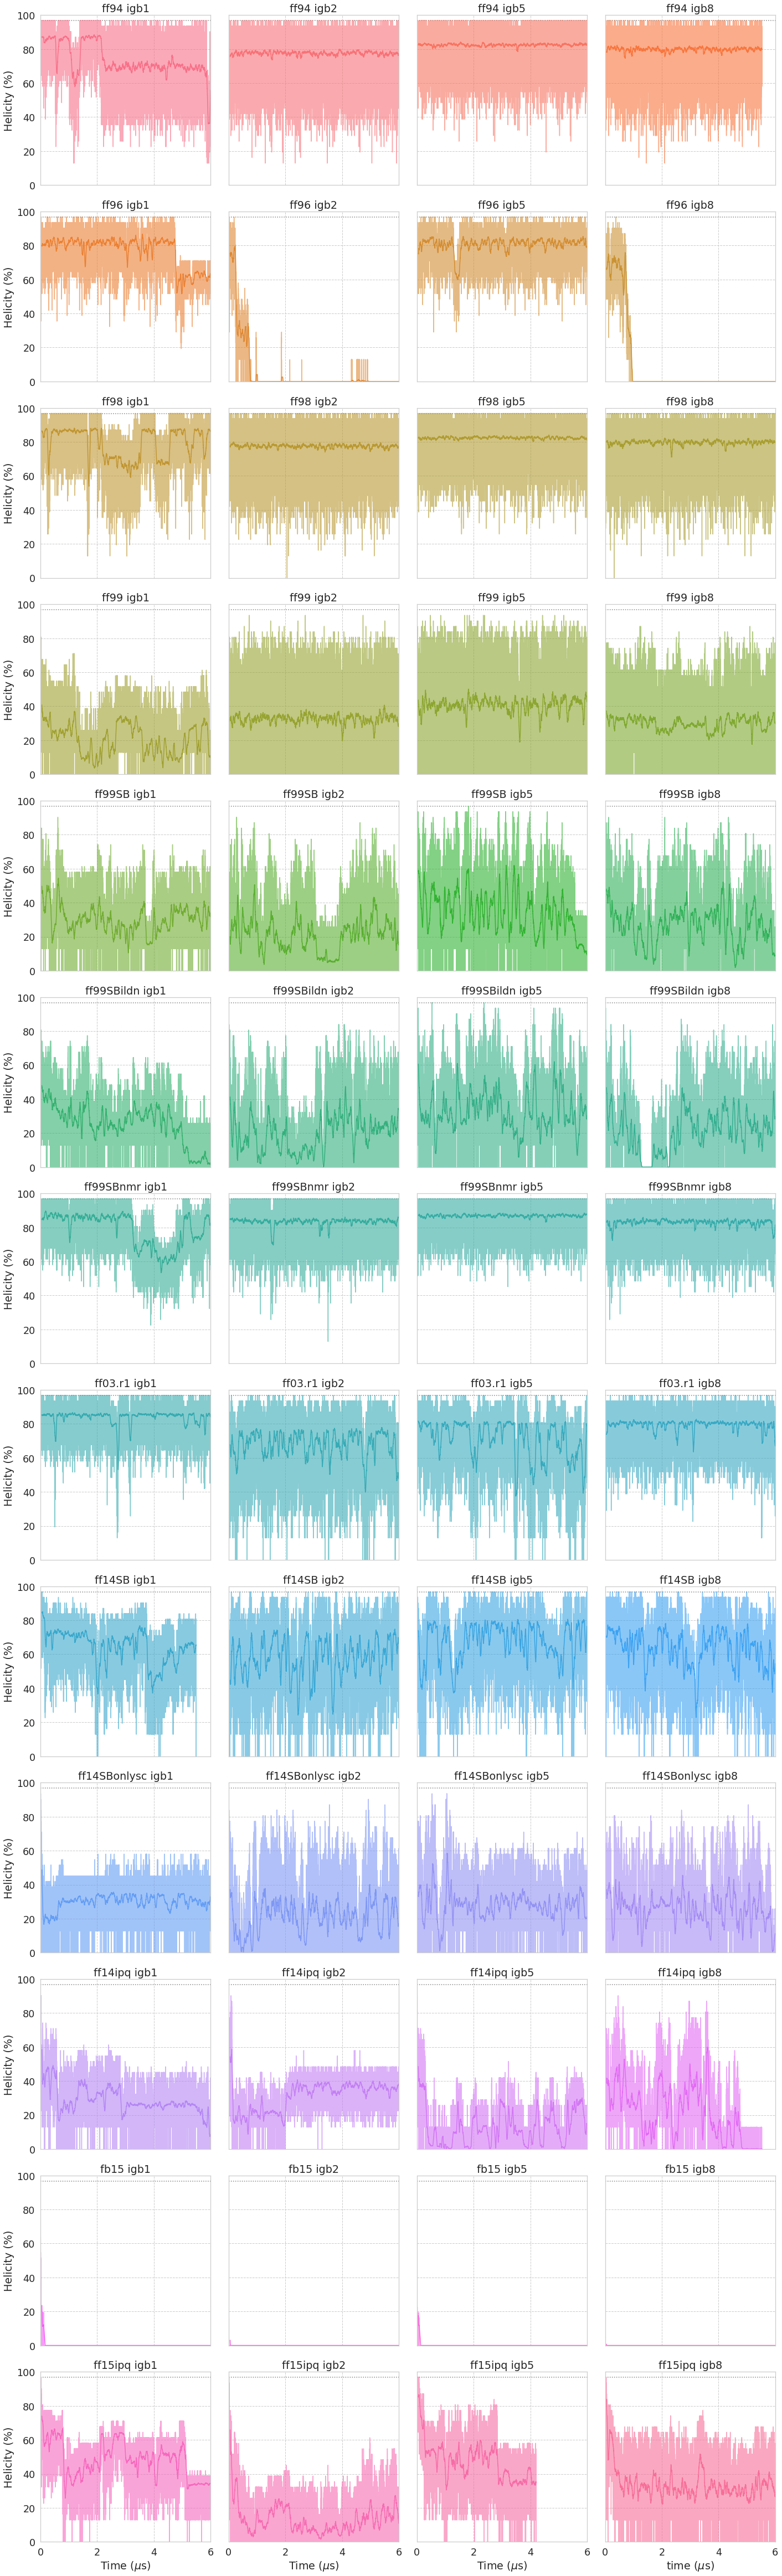

In [5]:
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_total, col="igbff", col_wrap=4, hue="igbff", size=5, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=96.76, ls=":", c=".5") # 90.9*33/31

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average').set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=0.6).set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 6) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
#plt.ylabel('Percentage helicity (%)')
plt.savefig('./helicity.pdf')
plt.savefig('./helicity.png')
plt.show()

In [6]:
df_total

,Frame,Fraction helicity,Time ($\mu$s),Helicity (%),Mouving average,igb,ff,igbff
0,1,0.848,0.0001,90.270968,NaN,igb1,ff94,ff94 igb1
1,2,0.758,0.0002,80.690323,NaN,igb1,ff94,ff94 igb1
2,3,0.879,0.0003,93.570968,NaN,igb1,ff94,ff94 igb1
3,4,0.848,0.0004,90.270968,NaN,igb1,ff94,ff94 igb1
4,5,0.879,0.0005,93.570968,NaN,igb1,ff94,ff94 igb1
5,6,0.758,0.0006,80.690323,NaN,igb1,ff94,ff94 igb1
6,7,0.818,0.0007,87.077419,NaN,igb1,ff94,ff94 igb1
7,8,0.788,0.0008,83.883871,NaN,igb1,ff94,ff94 igb1
8,9,0.848,0.0009,90.270968,NaN,igb1,ff94,ff94 igb1
9,10,0.848,0.0010,90.270968,NaN,igb1,ff94,ff94 igb1


In [7]:
temp=df_total.drop(columns=['Frame', 'Fraction helicity', r'Time ($\mu$s)', 'Mouving average', 'igb','ff' ])
temp

,Helicity (%),igbff
0,90.270968,ff94 igb1
1,80.690323,ff94 igb1
2,93.570968,ff94 igb1
3,90.270968,ff94 igb1
4,93.570968,ff94 igb1
5,80.690323,ff94 igb1
6,87.077419,ff94 igb1
7,83.883871,ff94 igb1
8,90.270968,ff94 igb1
9,90.270968,ff94 igb1


In [8]:
grouped=temp.groupby(['igbff'])
grouped

In [9]:
grouped.std()

,Helicity (%)
igbff,
fb15 igb1,3.059155
fb15 igb2,0.784488
fb15 igb5,2.249720
fb15 igb8,0.460499
ff03.r1 igb1,7.873248
ff03.r1 igb2,14.943242
ff03.r1 igb5,15.562923
ff03.r1 igb8,9.305667
ff14SB igb1,13.333287


In [10]:
grouped.mean()

,Helicity (%)
igbff,
fb15 igb1,0.321392
fb15 igb2,0.026015
fb15 igb5,0.211177
fb15 igb8,0.006447
ff03.r1 igb1,83.940136
ff03.r1 igb2,68.102338
ff03.r1 igb5,70.983365
ff03.r1 igb8,79.301810
ff14SB igb1,64.300745


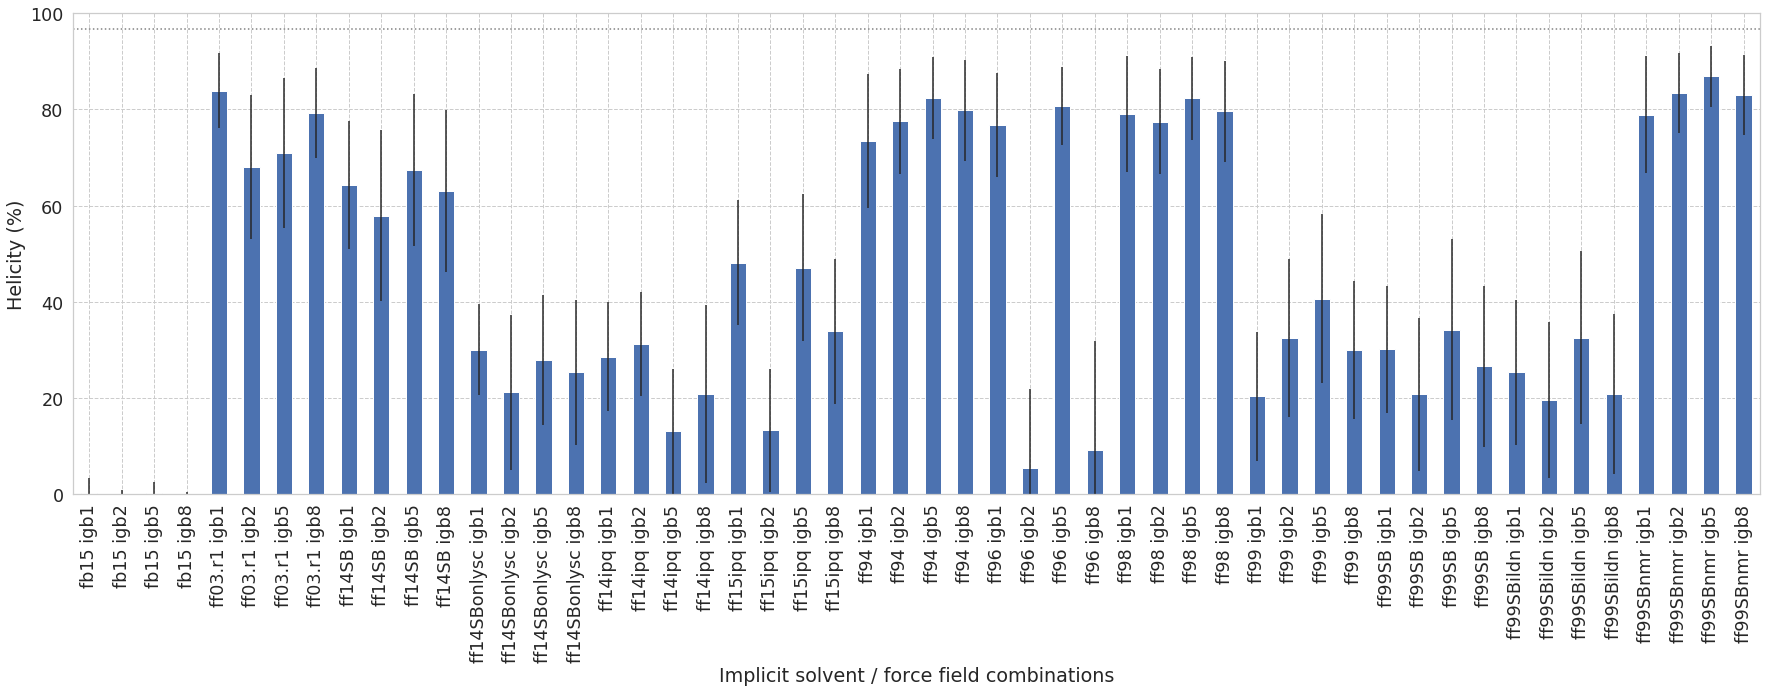

In [11]:
mean = grouped.mean()

errors = grouped.std()


ax=mean.plot(yerr=errors, kind='bar',figsize=(25,10), ylim=(0, 100), legend=False, rot=90 )
ax.set_ylabel('Helicity (%)')
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
plt.savefig('./helicity_avg.pdf')
plt.savefig('./helicity_avg.png')
#plt.show()

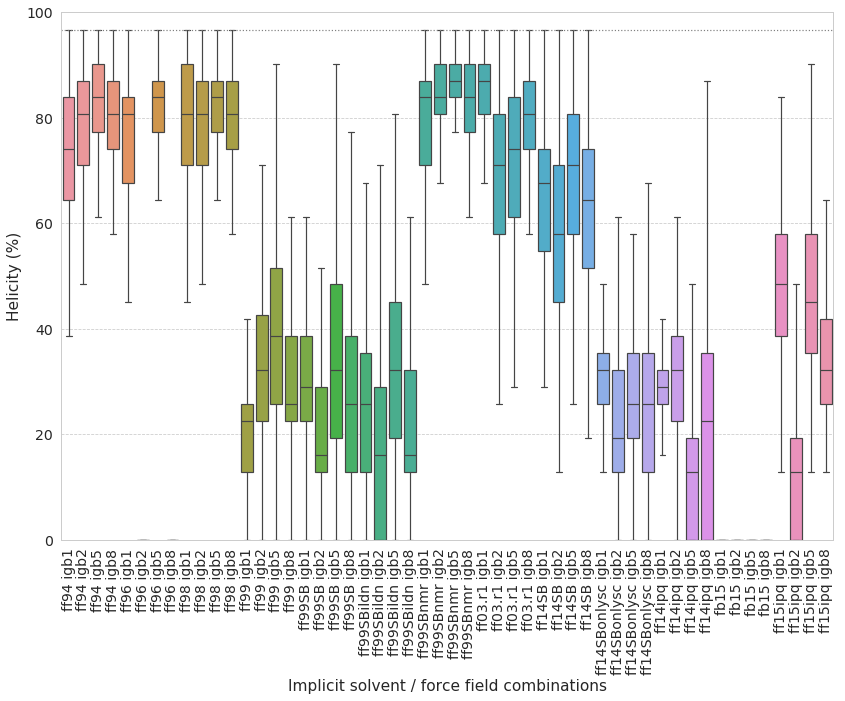

In [22]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

fig, axes = plt.subplots(figsize=(12, 10))

ax=sns.boxplot(x='igbff', y='Helicity (%)', data=df_total, fliersize=0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
#plt.savefig('./helicity_boxplot.pdf')
plt.savefig('./helicity_boxplot.png', dpi=600)

fb15 igb1                 AxesSubplot(0.1,0.820213;0.097561x0.0797872)
fb15 igb2            AxesSubplot(0.217073,0.820213;0.097561x0.0797872)
fb15 igb5            AxesSubplot(0.334146,0.820213;0.097561x0.0797872)
fb15 igb8             AxesSubplot(0.45122,0.820213;0.097561x0.0797872)
ff03.r1 igb1         AxesSubplot(0.568293,0.820213;0.097561x0.0797872)
ff03.r1 igb2         AxesSubplot(0.685366,0.820213;0.097561x0.0797872)
ff03.r1 igb5         AxesSubplot(0.802439,0.820213;0.097561x0.0797872)
ff03.r1 igb8              AxesSubplot(0.1,0.724468;0.097561x0.0797872)
ff14SB igb1          AxesSubplot(0.217073,0.724468;0.097561x0.0797872)
ff14SB igb2          AxesSubplot(0.334146,0.724468;0.097561x0.0797872)
ff14SB igb5           AxesSubplot(0.45122,0.724468;0.097561x0.0797872)
ff14SB igb8          AxesSubplot(0.568293,0.724468;0.097561x0.0797872)
ff14SBonlysc igb1    AxesSubplot(0.685366,0.724468;0.097561x0.0797872)
ff14SBonlysc igb2    AxesSubplot(0.802439,0.724468;0.097561x0.0797872)
ff14SB

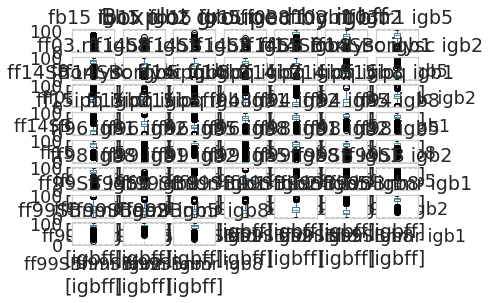

In [12]:
grouped.boxplot(by='igbff')

In [13]:
avg=mean.rename(columns={'Helicity (%)':'Mean'})
std=errors.rename(columns={'Helicity (%)':'Std'})
df1=pd.concat([avg,std], axis=1)
df1['igbff']=df1.index.astype('str') 
df1['Implicit solvent / Force field combination'] = df1['igbff'].astype('str') 
df1.dtypes

Mean                                          float64
Std                                           float64
igbff                                          object
Implicit solvent / Force field combination     object
dtype: object

In [14]:
plt.figure()
plt.errorbar(x= y=mean, yerr=errors)


SyntaxError: invalid syntax (<ipython-input-14-1d0f2cff0a76>, line 2)

In [ ]:
fig, axes = plt.subplots(1)
df1.plot( y='Mean', yerr='Std', ax=axes, kind='bar')

#axes.set(xlim=(3.0, 10.5) , ylim=(0, 1))

#lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc="lower left", borderaxespad=0., labelspacing=0.2)
axes.set_ylabel('Helicity (%)')